# Imports

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_data = pd.read_csv("datasets/titanic/train.csv")
test_data = pd.read_csv("datasets/titanic/test.csv")
combine = [train_data, test_data]

# 1. Titanic dataset Information

In [3]:
#overview
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- test data를 토대로 train data Survived를 예측하면 된다는 것을 알 수 있다.

## 1.1. variables

- **PassengerId** : 승객 아이디 / 불필요하다.
- **Survived** : 생존여부 (0 = N0, 1 = Yes)
- **Pclass** : 티켓 등급
- **Name** : 이름 
- **Sex** : 성별 
- **Age** : 나이 
- **SibSp** : 형제자매, 배우자 수 	
- **Parch**	: 부모, 자녀 수 // SibSp와 합쳐 FamilySize로 사용이 가능하다.
- **Ticket** 
- **Fare** : 비용
- **Cabin**	
- **Embarked** : 도착 장소 (C = Cherbourg, Q = Queenstown, S = Southampton)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# data types
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 2. Missing data

In [7]:
def draw_missing_data_table (df) :
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
draw_missing_data_table(train_data)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


<Axes: >

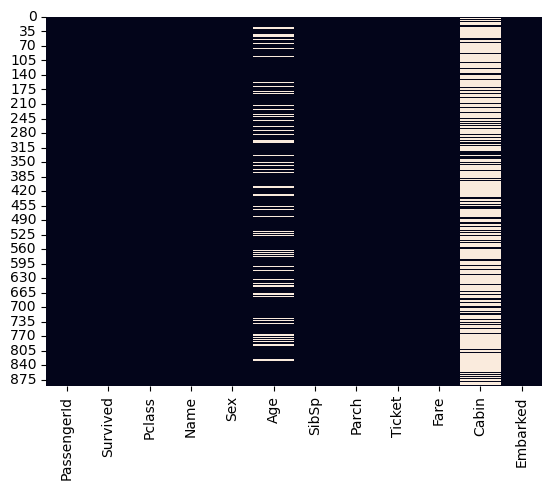

In [9]:
sns.heatmap(train_data.isnull(),cbar=False)

**Thoughts** :

* 'Cabin'은 77%가 존재하지 않으므로 삭제해준다. 
* 'Age'값은 19%가 존재하지 않으므로 보정해줘야 한다. 

In [10]:
train_data.drop('Cabin', axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2.1. PassengerId

- 불필요하기 때문에 삭제

In [11]:
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## 2.2. Pclass

In [12]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

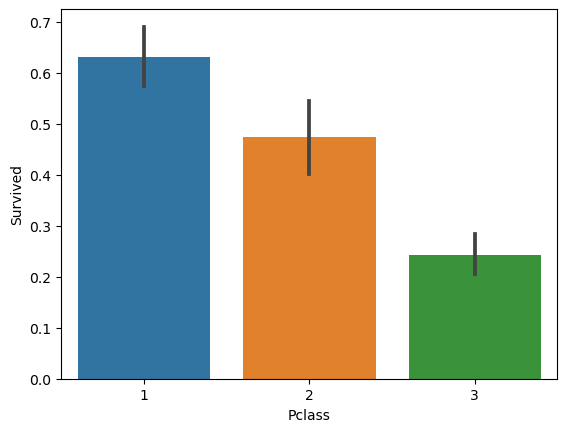

In [13]:
# plot

sns.barplot(x=train_data['Pclass'], y=train_data['Survived'])

- 1등급, 2등급, 3등급 순으로 생존율이 낮아진다.

## 2.3. Name

* 'Total'이라는 새로운 변수를 생성해 Mrs, Ms와 같이 구분해준다.
* Name을 drop한다. 
* 예를 들면 'Mrs'의 나이값이 비어있을 경우, 'Mrs'의 나이 평균값을 계산해서 빈 값에 넣어주는 과정을 진행하면 좋을 듯 싶다.

In [14]:
train_data['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

In [15]:
train_data['Title']=0
for i in train_data:
    train_data['Title']=train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [16]:
train_data['Title']=pd.Categorical(train_data['Title'])
train_data.dtypes

Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked      object
Title       category
dtype: object

<Axes: xlabel='Title', ylabel='Survived'>

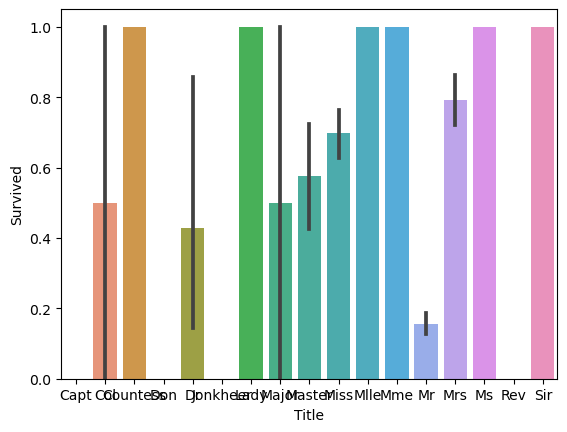

In [17]:
sns.barplot(x=train_data['Title'], y=train_data['Survived'])

* Master, Miss, Mr, Mrs을 제외하고 나머지를 Others로 바꾼다.

In [49]:
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

train_data['Title'] = train_data['Title'].map(titles_dict)
train_data['Title']=pd.Categorical(train_data['Title'])

<Axes: xlabel='Title', ylabel='Survived'>

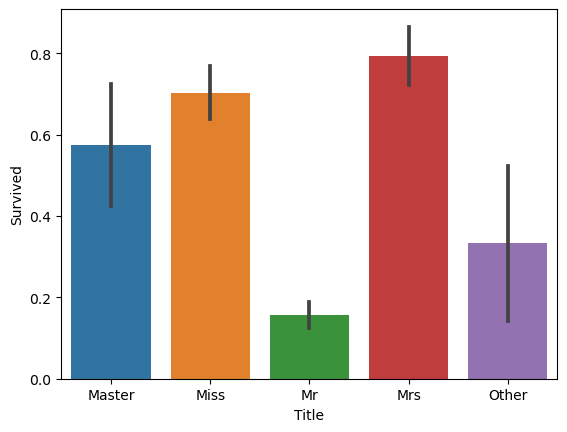

In [50]:
sns.barplot(x='Title', y='Survived', data=train_data)

'Mr' 타이틀을 가진 사람의 생존율은 높지 않다. 'Miss', 'Mrs'의 생존율이 높은 것을 보아 여성들의 생존율이 높을 것이라 예상된다

In [19]:
train_data.drop('Name', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


## 2.4. Sex

**Observations** 
 - 여자가 남자에 비해 생존율이 높다.

In [20]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


<Axes: xlabel='Sex', ylabel='Survived'>

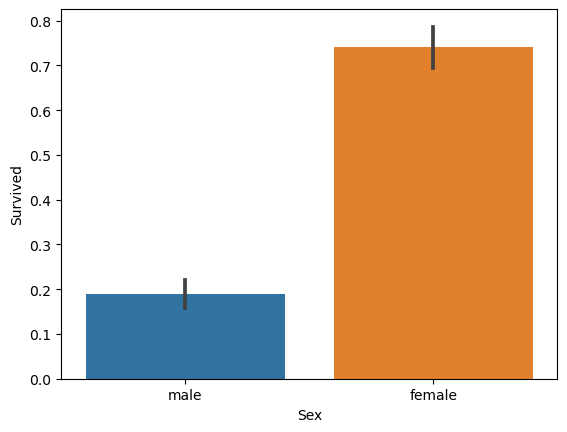

In [21]:
#plot

sns.barplot(x=train_data['Sex'], y=train_data['Survived'])

- 남성에 비해 여성이 생존율이 더 높은 것을 알 수 있다.
- 성별이 생존율에 가장 영향을 많이 미친다는 사실을 알 수 있다. 

## 2.5. Age

* Missing data 값이 총 19%이므로 보정해주는 과정을 가져야한다.


**Observations** 
 - 나이가 어리면(15세 이하) 생존율이 높다.
 - 나이가 많으면(50세 이상) 생존율이 높다.

<Axes: xlabel='Age'>

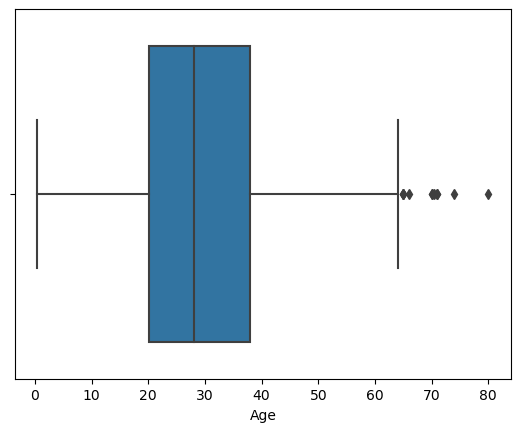

In [22]:
sns.boxplot(x=train_data['Age'])

In [23]:
means = train_data.groupby('Title')['Age'].mean()
means.head()

Title
Capt        70.0
Col         58.0
Countess    33.0
Don         40.0
Dr          42.0
Name: Age, dtype: float64

In [24]:
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [26]:
idx_nan_age = train_data.loc[np.isnan(train_data['Age'])].index
train_data.loc[idx_nan_age, 'Age'].loc[idx_nan_age] = train_data['Title'].loc[idx_nan_age].map(map_means)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr


<Axes: xlabel='Age', ylabel='Survived'>

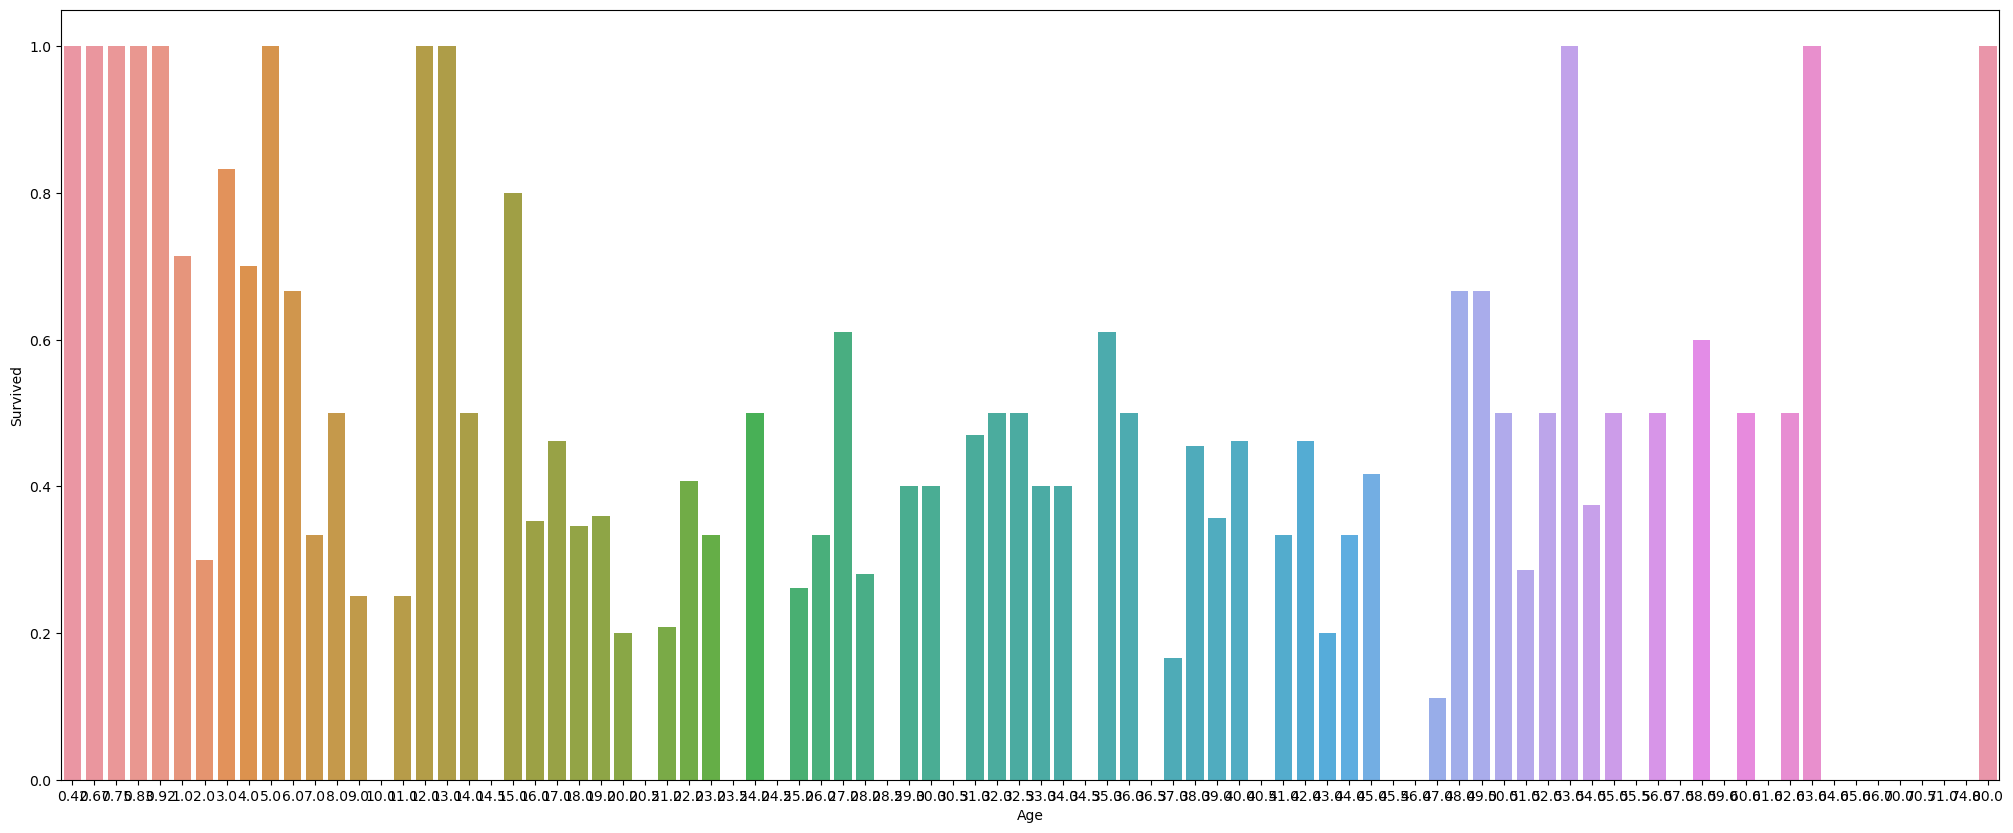

In [32]:
#plot

plt.figure(figsize=(25, 10))
sns.barplot(x=train_data['Age'], y=train_data['Survived'], errorbar=None)

* 0 ~15 / 15 ~ 50 / 50 ~ 80 으로 범위를 나눌 수 있다. 

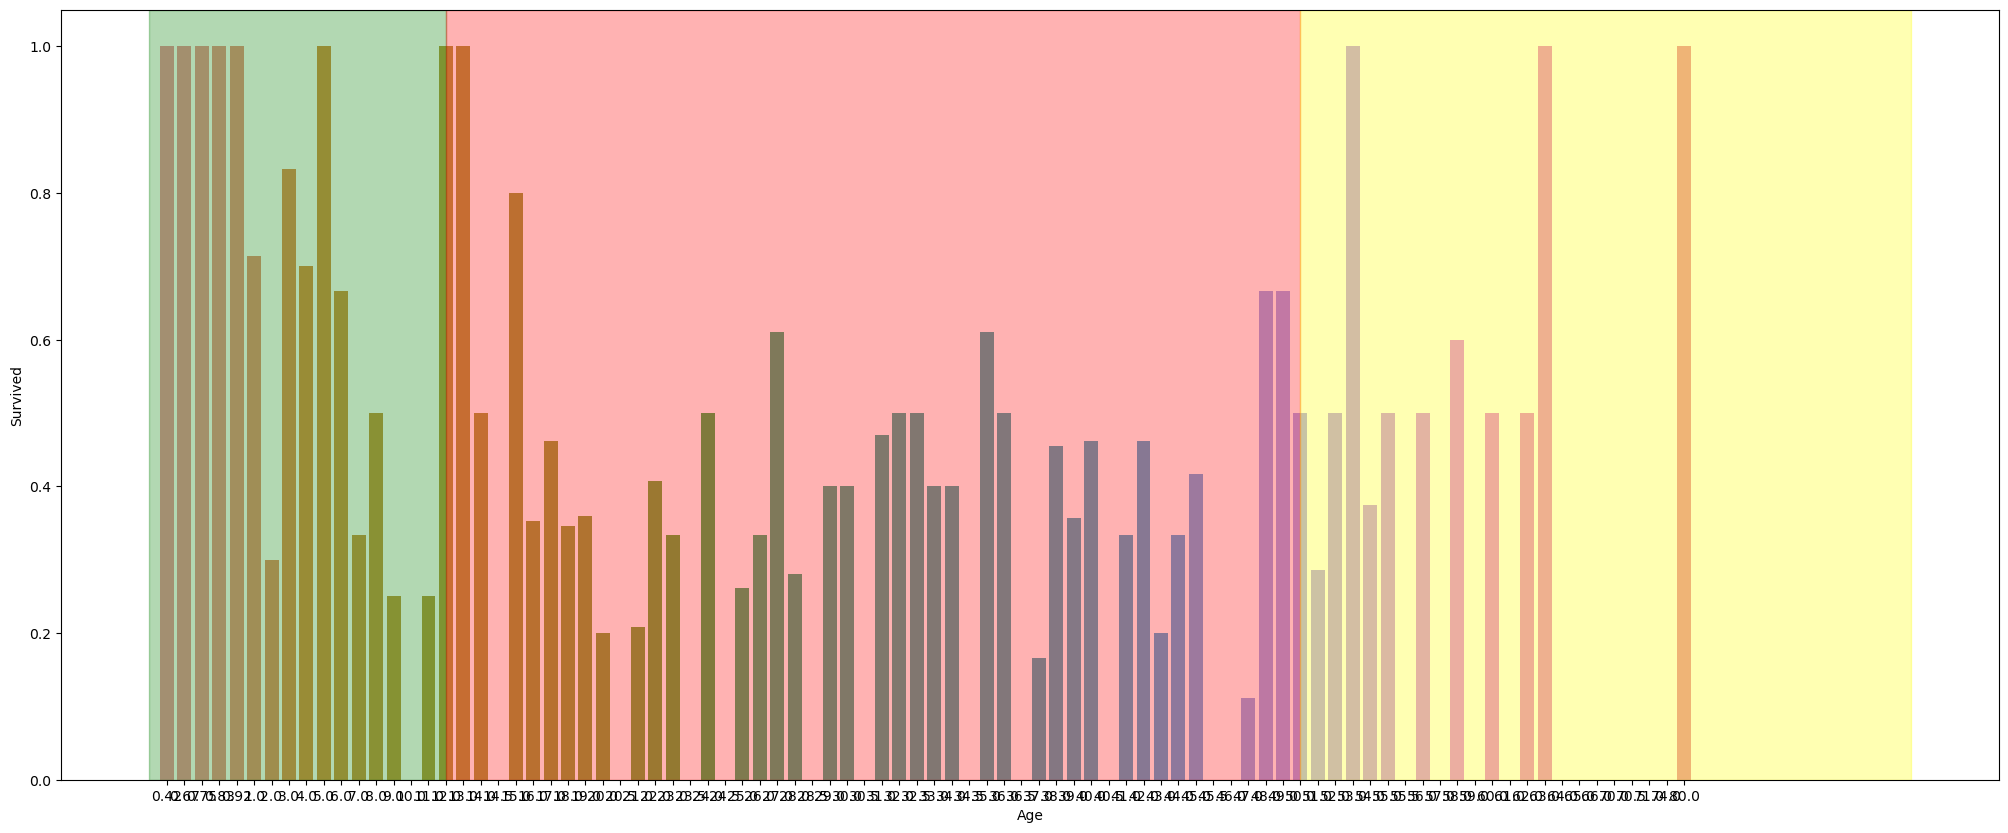

In [35]:
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(train_data[train_data['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(train_data[train_data['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(x=train_data['Age'], y=train_data['Survived'], errorbar=None)

plt.axvspan(-1, x_limit_1, alpha=0.3, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.3, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.3, color='yellow')

In [36]:
train_data['Age'] = pd.cut(train_data['Age'], bins=[0, 12, 50, 200], labels=['Child', 'Adult', 'Elder'])
train_data['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Elder']

<Axes: xlabel='Age', ylabel='Survived'>

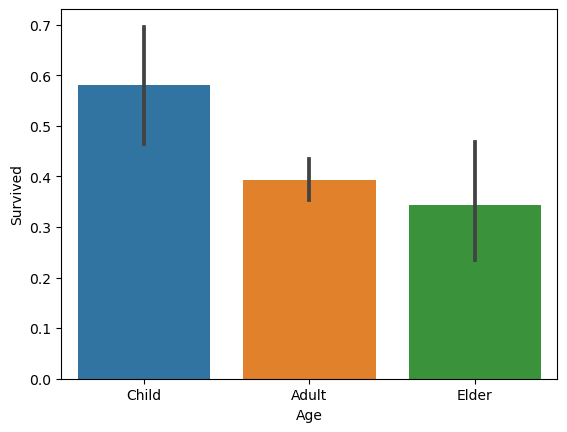

In [37]:
#plot

sns.barplot(x=train_data['Age'], y=train_data['Survived'])

0~15세 아이들이 가장 높은 생존율을 보여준다. 가설과 달리 50세 이상의 노인들은 낮은 생존율을 보여준다. 

## 2.6. SibSp & Parch

**observation**

    * 같이 탄 가족 수가 생존율에 영향을 미칠 것이다. (아이들은 부모와 같이 탔을 경우가 많으니 'Parch' 값이  높을수록 생존율이 높을 것이다.

In [38]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [39]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### create FamilySize

- SibSp와 Parch를 drop한다.

In [40]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

train_data.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Imputed,FamilySize
0,0,3,male,Adult,A/5 21171,7.2500,S,Mr,0,1
1,1,1,female,Adult,PC 17599,71.2833,C,Mrs,0,1
2,1,3,female,Adult,STON/O2. 3101282,7.9250,S,Miss,0,0
3,1,1,female,Adult,113803,53.1000,S,Mrs,0,1
4,0,3,male,Adult,373450,8.0500,S,Mr,0,0


In [41]:
train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


<Axes: xlabel='FamilySize', ylabel='Survived'>

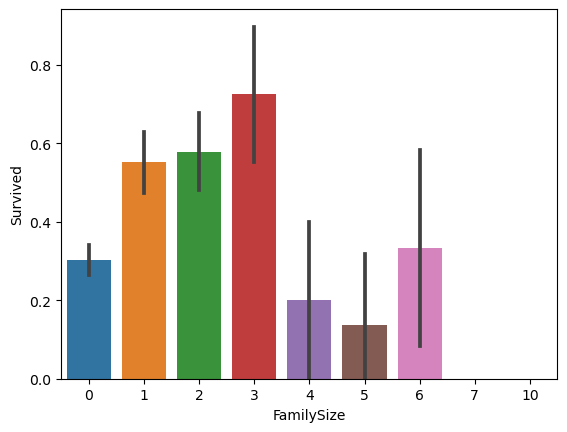

In [42]:
#plot

sns.barplot(x=train_data['FamilySize'], y=train_data['Survived'])

## 2.7. Ticket

In [43]:
train_data.drop('Ticket', axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Imputed,FamilySize
0,0,3,male,Adult,7.2500,S,Mr,0,1
1,1,1,female,Adult,71.2833,C,Mrs,0,1
2,1,3,female,Adult,7.9250,S,Miss,0,0
3,1,1,female,Adult,53.1000,S,Mrs,0,1
4,0,3,male,Adult,8.0500,S,Mr,0,0


## 2.8. Fare

<Axes: xlabel='Survived', ylabel='Fare'>

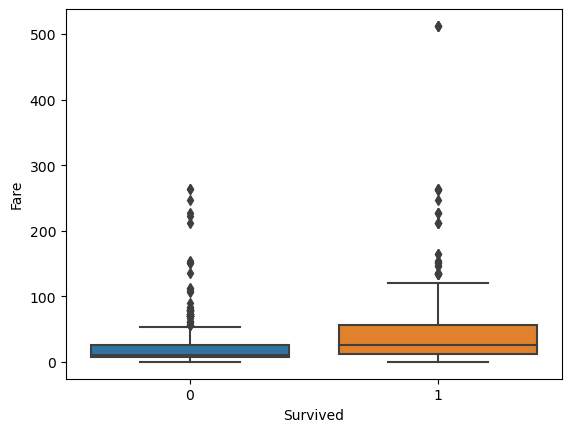

In [44]:
sns.boxplot(x=train_data['Survived'], y=train_data['Fare'])

#### Fare과 Pclass의 연관을 알아보자.

<Axes: xlabel='Survived', ylabel='Fare'>

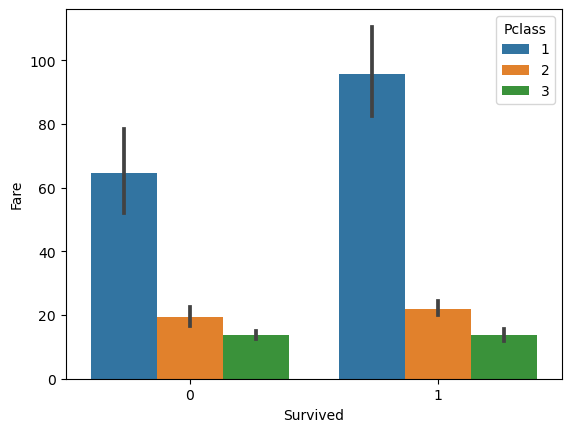

In [45]:
sns.barplot( x=train_data['Survived'], y=train_data['Fare'], hue=train_data['Pclass'] )

## 2.8. Embarked

<Axes: xlabel='Embarked', ylabel='Survived'>

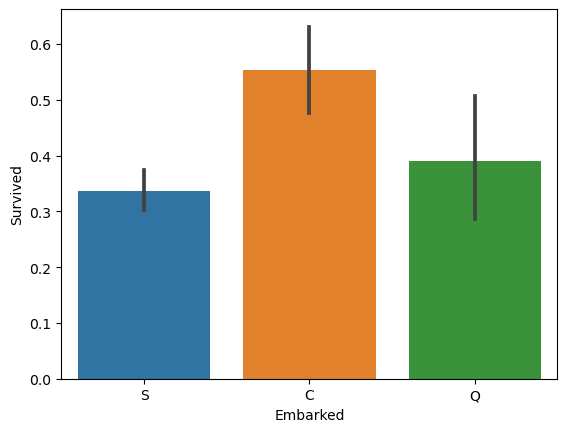

In [51]:
sns.barplot(x=train_data['Embarked'], y=train_data['Survived'])

In [ ]:
## 공부하기

## mean_age_func = train_data.groupby("Title")["Age"].mean()

In [ ]:
## mean_age_func

In [ ]:
## train_data["mean_age"] = train_data["Title"].map(lambda x: mean_age_func[x])

In [ ]:
## train_data["Title"].value_counts()

In [ ]:
## train_data["mean_age"].value_counts()

In [ ]:
## train_data["mean_age"]

# Model, predict and solve

In [ ]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log